# Importing python Library

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
len(bin(4))

5

# Importing Training Data

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [8]:
data.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
data.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [10]:
columns=['customer_id','Name','security_no','referral_id']
data.drop(columns,axis=1,inplace=True)

# Data Visualization

### 1. Age and Gender

In [12]:
data.age.unique().min()

10

In [13]:
data.age.unique().max()

64

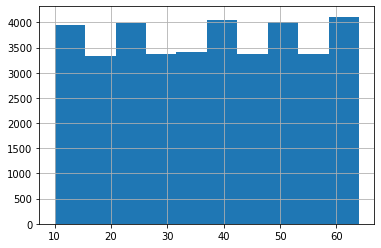

In [14]:
data['age'].hist()

In [15]:
data['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

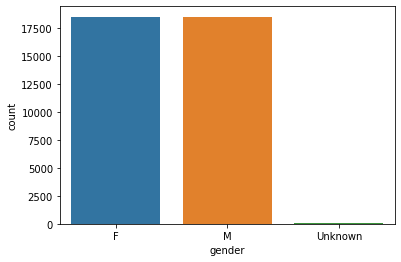

In [16]:
sns.countplot(x='gender',data=data)

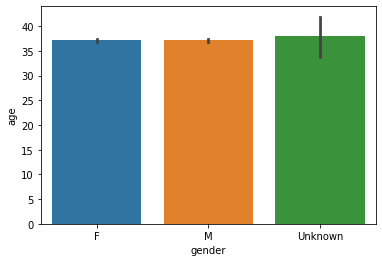

In [17]:
sns.barplot(x='gender',y='age', data=data)

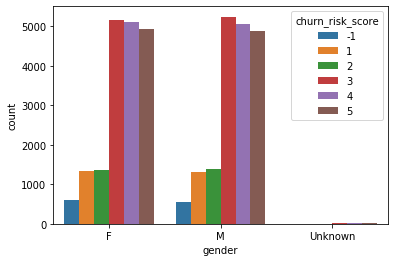

In [18]:
sns.countplot(x='gender',hue='churn_risk_score',data=data)

### 2. Region_category

In [19]:
data.region_category.unique()

array(['Village', 'City', 'Town', nan], dtype=object)

In [20]:
data.region_category.value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

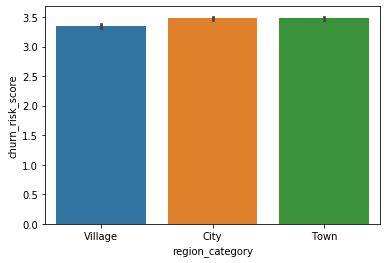

In [21]:
sns.barplot(x='region_category',y='churn_risk_score',data=data)

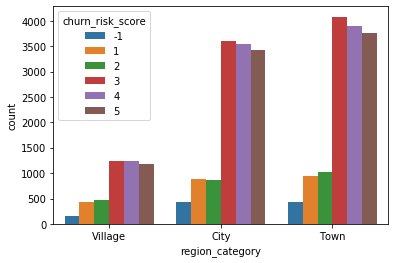

In [22]:
sns.countplot(x='region_category',hue='churn_risk_score',data=data)

This is an intresting insight, people from city and town are more likely to leave the business.
Lets see how many people are from village so we can atleast come to some concluison

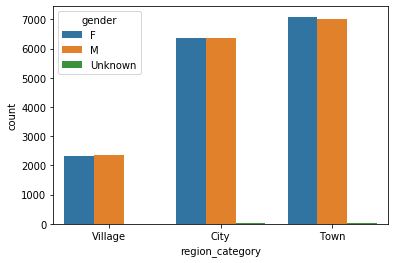

In [23]:
sns.countplot(x='region_category',hue='gender',data=data)

As people in village are less as compare to city or town, so its normal for people who lives in town and city are more likely to leave the business.

# 3. Membership category

In [24]:
data.membership_category.unique()

array(['Platinum Membership', 'Premium Membership', 'No Membership',
       'Gold Membership', 'Silver Membership', 'Basic Membership'],
      dtype=object)

[None, None, None, None, None, None, None, None, None, None, None, None]

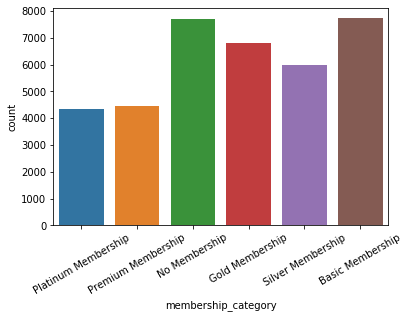

In [25]:
mem=sns.countplot(x='membership_category',data=data)
plt.setp(mem.get_xticklabels(), rotation=30)

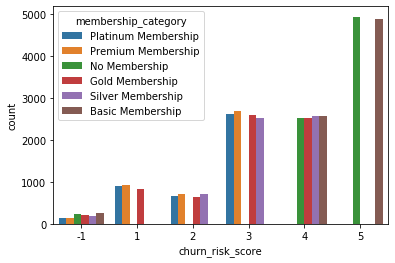

In [26]:
sns.countplot(x='churn_risk_score',hue='membership_category',data=data)

### 4.Joining_date and Joined_through_referral

In [27]:
data.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [28]:
data.joining_date.unique()

array(['2017-08-17', '2017-08-28', '2016-11-11', ..., '2017-12-11',
       '2016-09-25', '2017-04-15'], dtype=object)

In [29]:
data.joining_date=pd.to_datetime(data.joining_date)

In [30]:
data.joining_date[0]

Timestamp('2017-08-17 00:00:00')

In [31]:
data.joining_date.dt.year.unique()

array([2017, 2016, 2015], dtype=int64)

In [32]:
sns.set_style('darkgrid')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


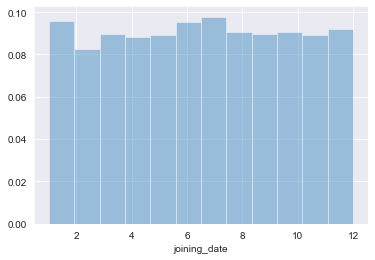

In [33]:
year_2015=data.joining_date[data.joining_date.dt.year==2015]
sns.distplot(year_2015.dt.month, bins=12, kde=False, norm_hist=True)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


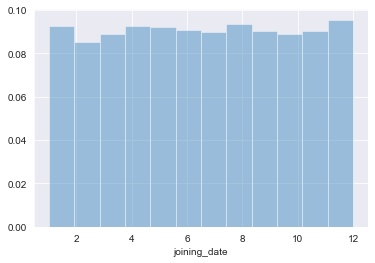

In [34]:
year_2016=data.joining_date[data.joining_date.dt.year==2016]
sns.distplot(year_2016.dt.month, bins=12, kde=False, norm_hist=True)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


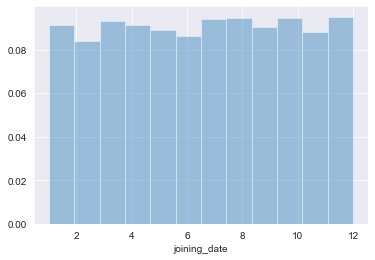

In [35]:
year_2017=data.joining_date[data.joining_date.dt.year==2017]
sns.distplot(year_2017.dt.month, bins=12, kde=False, norm_hist=True)

We couldn't find anything intresting in the Joining date.

In [36]:
data.joined_through_referral.unique()

array(['No', '?', 'Yes'], dtype=object)

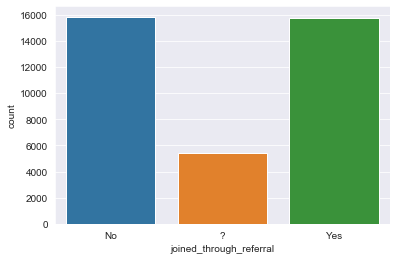

In [37]:
sns.countplot(x='joined_through_referral',data=data)

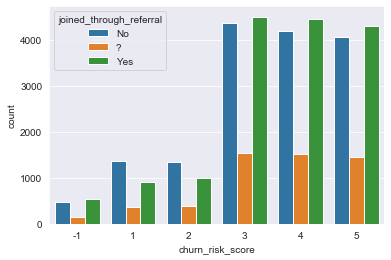

In [38]:
sns.countplot(x='churn_risk_score',hue='joined_through_referral',data=data)

### Medium of operation

In [39]:
data.medium_of_operation.unique()

array(['?', 'Desktop', 'Smartphone', 'Both'], dtype=object)

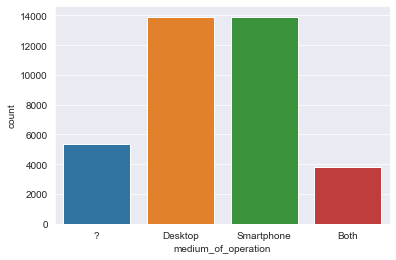

In [40]:
sns.countplot(x='medium_of_operation',data=data)

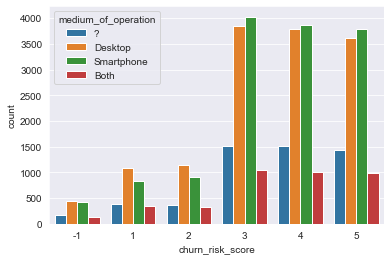

In [41]:
sns.countplot(x='churn_risk_score', hue='medium_of_operation',data=data)

In [42]:
data.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [43]:
data.used_special_discount.value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

### 5. Used_special_discount

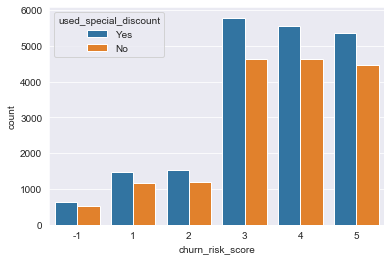

In [44]:
sns.countplot(x='churn_risk_score',hue='used_special_discount',data=data)

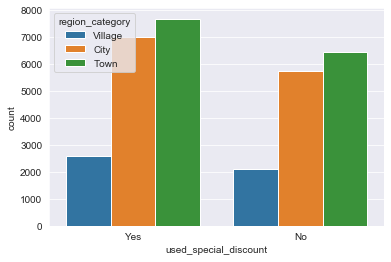

In [45]:
sns.countplot(x='used_special_discount',hue='region_category',data=data)

# 6. Offer_application_preference

In [46]:
data.offer_application_preference.unique()

array(['Yes', 'No'], dtype=object)

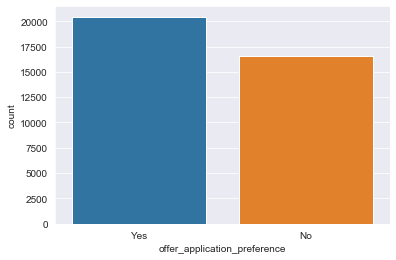

In [47]:
sns.countplot(x='offer_application_preference',data=data)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


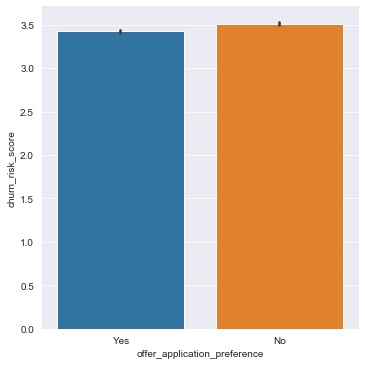

In [48]:
sns.factorplot(x ='offer_application_preference', y ='churn_risk_score', data = data, kind ='bar')

# Cleaning the data

In [49]:
data.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [50]:
data['gender']=np.where(data['gender']=='M',1,0)

In [51]:
missing_values = ["n/a", "na", "--",'?']
data = pd.read_csv("train.csv", na_values = missing_values)

In [52]:
data.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
referral_id                        0
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       31554 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           31599 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [55]:
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]

# calculate the percentage of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas
data_na = data[vars_with_na].isnull().mean()

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
data_na

,variable,na_percentage
1,joined_through_referral,0.147005
0,region_category,0.146734
3,medium_of_operation,0.145788
4,points_in_wallet,0.093074
2,preferred_offer_types,0.007785


As only maximum 14% of data is missing in 3 columns, we can impute it.

As points in wallet is a float variable, lets fix it first.


In [56]:
#points in wallet
mean=data["points_in_wallet"].mean()
data['points_in_wallet'].fillna((data['points_in_wallet'].mean()), inplace=True)

In [57]:
#preffered offer types
data['preferred_offer_types'].fillna(data['preferred_offer_types'].mode()[0], inplace = True)

In [58]:
#region_category
data['region_category'].fillna(data['region_category']=='Missing', inplace = True)

In [59]:
#Joined through referral
data['joined_through_referral'].fillna(data['joined_through_referral'].mode()[0], inplace = True)

Missing value in mode of operation is treated as new values. So when we will use label encoder, it will be treated as new value.

In [60]:
data.churn_risk_score.value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

#Here there is a rows in dependent variable with value '-1', but according to the given description, it was told the value will be from 1 to 5, so as the number of values with -1 is just over 1000, we can drop such rows.

In [61]:
index_names = data[ data['churn_risk_score'] == -1 ].index
  
# drop these row indexes
# from dataFrame
data.drop(index_names, inplace = True)

In [62]:
data.churn_risk_score.value_counts()

3    10424
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

# Fix Categorical Columns

In [63]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,No,CID21329,...,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5


Looking for columns which are categorical

In [64]:
objList = data.select_dtypes(include = "object").columns
objList

Index(['customer_id', 'Name', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'avg_frequency_login_days',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback'],
      dtype='object')

#Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

#Finding columns which is more important with respect to Dependent Variable.

In [66]:
data.corr()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
customer_id,1.000000,0.002491,0.007461,0.012310,-0.006451,0.003636,-0.003518,-0.000745,0.006680,-0.003689,...,0.006224,-0.004698,0.002965,-0.003818,-0.001611,0.001389,0.002051,0.006014,-0.001181,-0.001588
Name,0.002491,1.000000,-0.002713,-0.002882,-0.001386,-0.002321,0.002938,0.008550,-0.002109,0.007036,...,0.013289,0.002092,-0.001150,0.002192,0.000935,0.003202,-0.000397,-0.000454,-0.000148,-0.007165
age,0.007461,-0.002713,1.000000,0.000556,-0.000796,0.006028,-0.000538,-0.011537,0.001392,0.002742,...,0.000299,0.000015,0.005342,0.000360,-0.004659,0.002539,0.003573,0.002813,-0.007297,0.002400
gender,0.012310,-0.002882,0.000556,1.000000,0.006026,0.000286,0.003543,0.001660,-0.005475,0.007225,...,-0.009823,0.004268,0.005983,-0.009574,-0.001695,0.000910,-0.008438,-0.001261,-0.001745,-0.003383
security_no,-0.006451,-0.001386,-0.000796,0.006026,1.000000,0.005873,-0.011574,0.003799,0.001830,0.002037,...,-0.000107,0.006856,0.002617,-0.003291,-0.002552,-0.000558,-0.007093,0.000195,0.012825,0.005809
region_category,0.003636,-0.002321,0.006028,0.000286,0.005873,1.000000,0.015739,0.004022,-0.008757,0.009314,...,0.003315,0.014313,-0.003097,0.012435,-0.002580,-0.002792,0.001488,-0.000306,0.013207,-0.025257
membership_category,-0.003518,0.002938,-0.000538,0.003543,-0.011574,0.015739,1.000000,-0.004631,-0.008051,0.009259,...,0.005006,0.094539,0.000907,0.162253,0.006891,0.005316,-0.010367,-0.006603,0.086990,-0.441009
joining_date,-0.000745,0.008550,-0.011537,0.001660,0.003799,0.004022,-0.004631,1.000000,0.004202,-0.000743,...,0.005918,-0.001414,0.003467,0.000298,0.000139,-0.001076,-0.001177,0.001493,0.007276,0.010050
joined_through_referral,0.006680,-0.002109,0.001392,-0.005475,0.001830,-0.008757,-0.008051,0.004202,1.000000,-0.516982,...,0.128057,-0.028129,-0.007337,-0.009353,0.020011,0.015640,0.000531,0.001793,-0.030049,0.048036
referral_id,-0.003689,0.007036,0.002742,0.007225,0.002037,0.009314,0.009259,-0.000743,-0.516982,1.000000,...,-0.083733,0.026553,0.007103,0.007845,-0.019287,-0.007899,-0.004185,-0.000631,0.022666,-0.035534


# Feature Selection

1. Tree Selection

[0.04333507 0.04300641 0.04280712 0.02086837 0.04290463 0.03010455
 0.23691677 0.0433125  0.00913966 0.03179244 0.02122841 0.03053849
 0.02802691 0.04324336 0.04021559 0.04245662 0.09177822 0.04491997
 0.0964843  0.00955204 0.00736858]


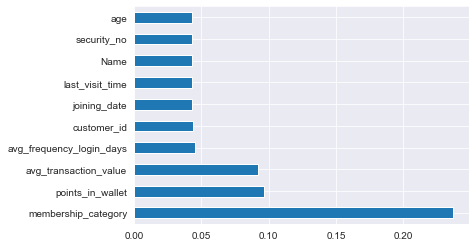

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:21]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

2.Correlation

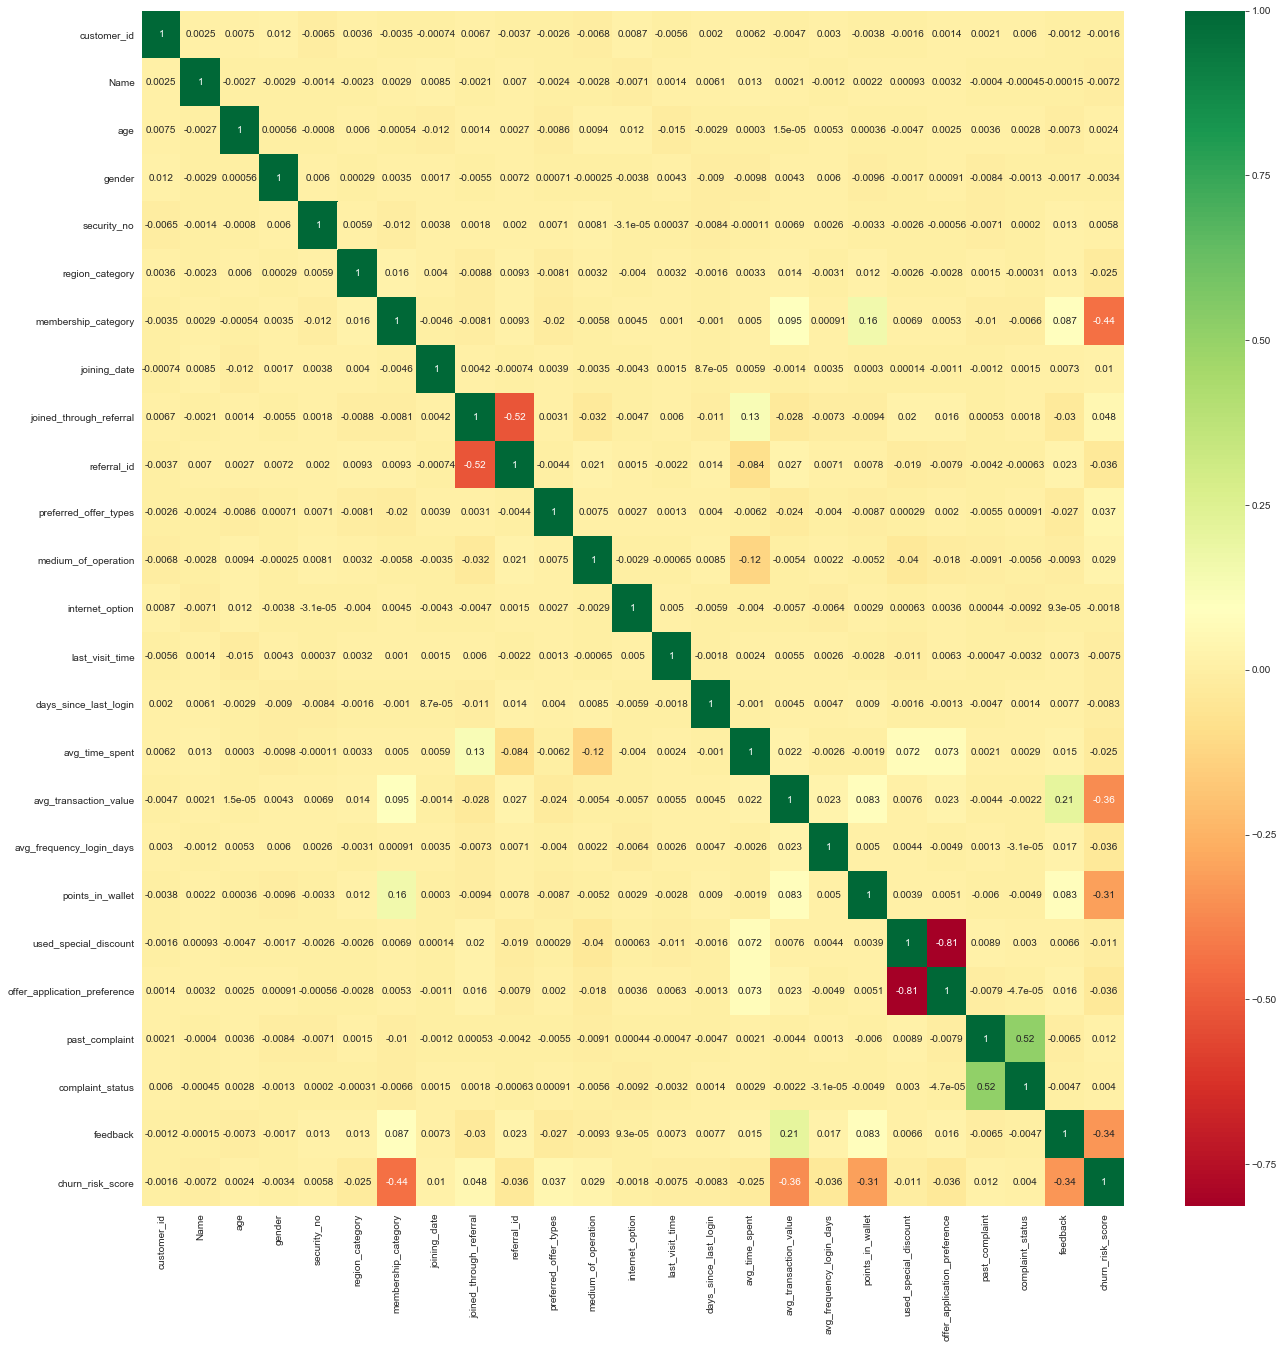

In [68]:
X = data.iloc[:,0:21]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,22))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#dropping columns which are not useful.

In [71]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,31189,27778,18,0,33711,3,3,959,0,11119,...,300.63,53005.25,718,781.750000,1,1,0,1,4,2
1,6706,33860,32,0,5609,0,4,970,0,2174,...,306.34,12838.38,705,686.882199,1,0,1,2,5,1
2,5611,24521,44,0,1474,2,2,680,1,459,...,516.16,21027.00,750,500.690000,0,1,1,3,3,5
3,31345,10129,37,1,31471,0,2,667,1,5383,...,53.27,25239.56,1573,567.660000,0,1,1,4,3,5
4,5762,23934,31,0,28871,0,2,985,0,11119,...,113.13,24483.66,716,663.060000,0,1,1,2,3,5


In [73]:
columns=['customer_id','Name','security_no','referral_id']
data.drop(columns,axis=1,inplace=True)

KeyError: "['customer_id' 'Name' 'security_no' 'referral_id'] not found in axis"

I had re-run the cell twice, so ignore the error :p

In [74]:
data.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,0,3,3,959,0,1,3,2,19686,...,300.63,53005.25,718,781.750000,1,1,0,1,4,2
1,32,0,0,4,970,0,1,1,1,15407,...,306.34,12838.38,705,686.882199,1,0,1,2,5,1
2,44,0,2,2,680,1,1,1,2,27964,...,516.16,21027.00,750,500.690000,0,1,1,3,3,5
3,37,1,0,2,667,1,1,1,1,19480,...,53.27,25239.56,1573,567.660000,0,1,1,4,3,5
4,31,0,0,2,985,0,0,2,1,19267,...,113.13,24483.66,716,663.060000,0,1,1,2,3,5


In [75]:
dataset=data.copy()

In [76]:
#suffuling the data
data = data.sample(frac = 1)

In [77]:
dataset=data.copy()
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [78]:
#splitting for train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [79]:
#importing and defining the ML algorithm from scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC,SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder 


In [80]:
models=[LogisticRegression(),        
        LinearSVC(),        
        SVC(kernel='rbf'),        
        KNeighborsClassifier(),        
        RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0),        
        DecisionTreeClassifier(criterion='entropy',random_state=0,splitter='best'),        
        GradientBoostingClassifier(),
        GaussianNB(),
        XGBClassifier()]

In [81]:
model_names=['LogisticRegression','LinearSVM','rbfSVM', 'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree', 'GradientBoostingClassifier', 'GaussianNB','XGBoost'] 

In [82]:
#we will now loop over each model and then we will evaluate the accuracy
acc=[] 
eval_acc={}
for model in range(len(models)):    
    classification_model=models[model]    
    classification_model.fit(X_train,y_train)    
    pred=classification_model.predict(X_test)    
    acc.append(accuracy_score(pred,y_test)) 
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False wh

[16:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [83]:
acc_table=pd.DataFrame(eval_acc) 
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False]) 
acc_table

,Modelling Algorithm,Accuracy
6,GradientBoostingClassifier,0.789350
8,XGBoost,0.777741
4,RandomForestClassifier,0.772047
5,DecisionTree,0.768252
7,GaussianNB,0.513173
0,LogisticRegression,0.378768
2,rbfSVM,0.331994
3,KNearestNeighbors,0.323510
1,LinearSVM,0.278634


In [ ]:
#Feeding the whole data to the model

In [70]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,31189,27778,18,0,33711,3,3,959,0,11119,...,300.63,53005.25,718,781.750000,1,1,0,1,4,2
1,6706,33860,32,0,5609,0,4,970,0,2174,...,306.34,12838.38,705,686.882199,1,0,1,2,5,1
2,5611,24521,44,0,1474,2,2,680,1,459,...,516.16,21027.00,750,500.690000,0,1,1,3,3,5
3,31345,10129,37,1,31471,0,2,667,1,5383,...,53.27,25239.56,1573,567.660000,0,1,1,4,3,5
4,5762,23934,31,0,28871,0,2,985,0,11119,...,113.13,24483.66,716,663.060000,0,1,1,2,3,5


# Importing Test data

In [84]:
test=pd.read_csv('test.csv')

In [85]:
test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [86]:
missing_values = ["n/a", "na", "--",'?']
test = pd.read_csv("test.csv", na_values = missing_values)

In [87]:
vars_with_na = [var for var in test.columns if test[var].isnull().mean() > 0]

# calculate the percentage of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas
test_na = test[vars_with_na].isnull().mean()

# transform the array into a dataframe
test_na = pd.DataFrame(test_na.reset_index())

# add column names to the dataframe
test_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
test_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
test_na


,variable,na_percentage
1,joined_through_referral,0.150510
3,medium_of_operation,0.148803
0,region_category,0.147999
4,points_in_wallet,0.098549
2,preferred_offer_types,0.007982


In [88]:
#points in wallet
mean=test["points_in_wallet"].mean()
test['points_in_wallet'].fillna((test['points_in_wallet'].mean()), inplace=True)

#preffered offer types
test['preferred_offer_types'].fillna(test['preferred_offer_types'].mode()[0], inplace = True)

#region_category
test['region_category'].fillna(test['region_category']=='Missing', inplace = True)

#Joined through referral
test['joined_through_referral'].fillna(test['joined_through_referral'].mode()[0], inplace = True)

In [89]:
test.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                    0
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types              0
medium_of_operation             2964
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [90]:
columns=['customer_id','Name','security_no','referral_id']
test.drop(columns,axis=1,inplace=True)

In [91]:
objList = test.select_dtypes(include = "object").columns
objList


Index(['gender', 'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'avg_frequency_login_days', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    test[feat] = le.fit_transform(test[feat].astype(str))

In [93]:
data.shape

(35829, 21)

In [94]:
test.shape

(19919, 20)

In [95]:
train_data=data.iloc[:,:-1]
target=data.iloc[:,-1]
test_data=test.iloc[:]

# Gradient Boosting

In [1]:
model1= GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
warm_start=True)

NameError: name 'GradientBoostingClassifier' is not defined

In [811]:
model1.fit(train_data,target)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=9,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [812]:
test_prediction1=model1.predict(test_data)

In [813]:
customer_id = test1['customer_id']
submission_df_3 = pd.DataFrame({
                  "customer_id": customer_id, 
                  "churn_risk_score": test_prediction1})

In [814]:
submission_df_3.shape

(19919, 2)

In [815]:
submission_df_3.to_csv('submission_3.csv', index=False)

#XGBoost ----> Trying another method and optimal gradient bossting technique

In [101]:
test1=pd.read_csv('test.csv')

In [114]:
from xgboost import XGBClassifier
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [115]:
model.fit(train_data,target)

[16:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=1, silent=False, subsample=0.8,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [116]:
res_xg=model.predict(test_data)

In [117]:
customer_id = test1['customer_id']
submission_df_6 = pd.DataFrame({
                  "customer_id": customer_id, 
                  "churn_risk_score": res_xg})

#Making Submission file

In [118]:
submission_df_6.to_csv('submission_6.csv', index=False)